# Mutual Information

Mutual Information (MI) is a measure of the mutual dependence between the two variables. It quantifies the "amount of information" obtained about on random variable through observing the other random variable. [Wikipedia](https://en.wikipedia.org/wiki/Mutual_information) 

$$ I(X;Y) = H(X)-H(X|Y) = \sum_{x \in X}\sum_{y \in Y} P(x, y) \log(\frac{P(x,y)}{P(x) P(y)}) $$

where, 
* $I$ is the mutual information 
* $P(X, Y)$ is the probability of X and Y occuring together 
* $P(X)$ is the probability of X
* $P(Y)$ is the probability of Y

It determines how similar the joint distribution $P(X, Y)$ to the products of individual distributions $P(X)$ and $P(Y)$. 

If X and Y are independent, $P(X, Y)=P(X)P(Y)$, which makes the $\log(\frac{P_{(X, Y)}(x,y)}{P_X(x) P_Y(y)})=\log(1) = 0$, and the entire equation becomes zero. Therefore, **If X and Y are independent, mutual information is zero.**

On the other hand, if X is deterministic of Y, meaning by knowing X we can estimate Y, the mutual information is the uncertainty in X. 

Example: 

Let us suppose we have a join distribution table like below: 

.        | Y=0 | Y=1 | Y=2 | Marginals
---      | --- | --- | --- | ---
X=0      | 0.2 | 0.1 | 0.2 | 0.5
X=1      | 0   | 0.2 | 0.1 | 0.3
X=2      | 0.1 | 0   | 0.1 | 0.2
Marginals| 0.3 | 0.3 | 0.4 | 1

The mutual information between X and Y is; 

$$ 
I(X, Y) = 
p(0,0) \times \log \frac{p(0, 0)}{p(0)p(0)} 
+ p(0,1) \times \log \frac{p(0, 1)}{p(0)p(1)}
+ p(0,2) \times \log \frac{p(0, 2)}{p(0)p(2)}
+ p(1,0) \times \log \frac{p(1, 0)}{p(1)p(0)}
+ p(1,1) \times \log \frac{p(1, 1)}{p(1)p(1)}
+ p(1,2) \times \log \frac{p(1, 2)}{p(1)p(2)}
+ p(2,0) \times \log \frac{p(2, 0)}{p(2)p(0)}
+ p(2,1) \times \log \frac{p(2, 1)}{p(2)p(1)}
+ p(2,2) \times \log \frac{p(2, 2)}{p(2)p(2)} \\ 
= 0.2 \times \log \frac{0.2}{0.3 \times 0.5} + ... + 0.1 \times \log \frac{0.1}{0.4 \times 0.2}
$$


Steps:
step 1: determine mutual information between each feature and the target  
    - `mutual_info_classif` for classification  
    - `mutual_info_regression` for regression   
Step 2: rank the features based on the mutual information   
Step 3: select top k ranking features 

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Classification

In [2]:
data = pd.read_csv('../datasets/dataset_2.csv')

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Determine Mutual Information

In [5]:
# calculate the mutual information between the variables and the target 

mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.60795297e-03, 0.00000000e+00, 1.12985522e-03,
       4.94264449e-04, 5.28757275e-03, 5.14735993e-03, 3.01348838e-03,
       0.00000000e+00, 7.33865639e-05, 6.83849088e-04, 9.48726743e-04,
       9.10589575e-04, 5.24108309e-03, 0.00000000e+00, 1.42653172e-02,
       0.00000000e+00, 0.00000000e+00, 9.15334171e-05, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.58943873e-03, 1.51381008e-03, 0.00000000e+00, 0.00000000e+00,
       4.89075229e-03, 1.69924494e-02, 0.00000000e+00, 2.18421227e-03,
       4.41023640e-04, 2.01778204e-03, 4.46570881e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.24793681e-03,
       6.76968450e-05, 1.97881621e-03, 0.00000000e+00, 2.61968381e-03,
       0.00000000e+00, 4.24181589e-04, 0.00000000e+00, 2.46611369e-03,
       0.00000000e+00, 3.44998991e-03, 4.07589443e-02, 1.74383386e-03,
      

Text(0, 0.5, 'Mutual Information')

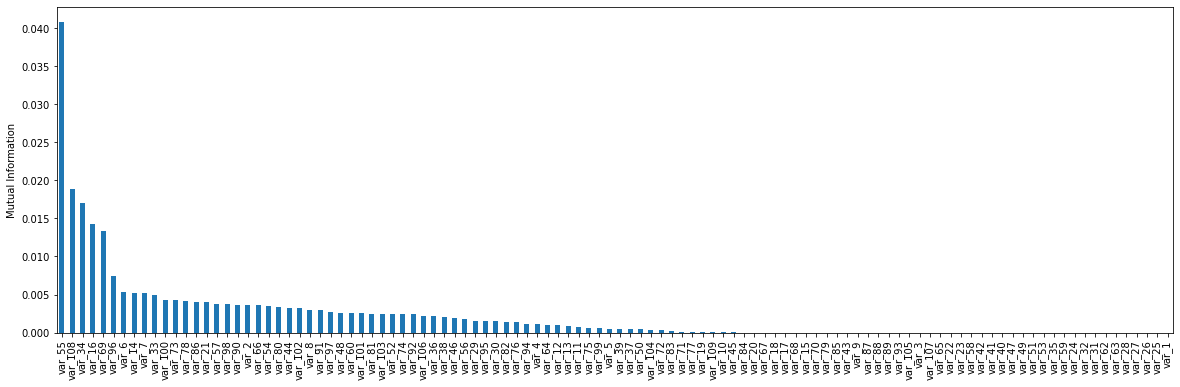

In [6]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel("Mutual Information")

## Select top K features based on MI

In [7]:
kb = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
kb.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False])

In [8]:
# print out the feature names 
X_train.columns[kb.get_support()]

Index(['var_6', 'var_14', 'var_16', 'var_33', 'var_34', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [9]:
# remove the rest of the features
X_train = kb.transform(X_train)
X_test = kb.transform(X_test)

In [10]:
X_train

array([[ 0.79960284, 12.7360361 ,  0.        , ...,  0.        ,
         5.73697899,  1.31290935],
       [ 1.7325008 ,  8.59324184,  0.91      , ...,  0.        ,
         7.37393053,  5.12516451],
       [ 0.78311953, 12.08686478,  0.        , ...,  0.        ,
         6.57956353,  1.00831432],
       ...,
       [ 0.61597367, 14.81376669,  0.        , ...,  0.        ,
         6.66460223,  1.00656477],
       [ 2.83428612,  9.32681091,  0.98      , ...,  0.        ,
         8.17488252,  3.87768035],
       [ 0.99669815, 11.83671643,  1.9       , ...,  0.        ,
         4.92927406,  4.05207893]])

# Regression

In [11]:
# load dataset
data = pd.read_csv('../datasets/houseprice.csv')
data.shape

(1460, 81)

In [12]:
# ideally feature selection is done after categorical data encoding. 
# here, we will only use numeric data for simplicity 

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [13]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [14]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## Determine Mutual Information

Text(0, 0.5, 'Mutual Information')

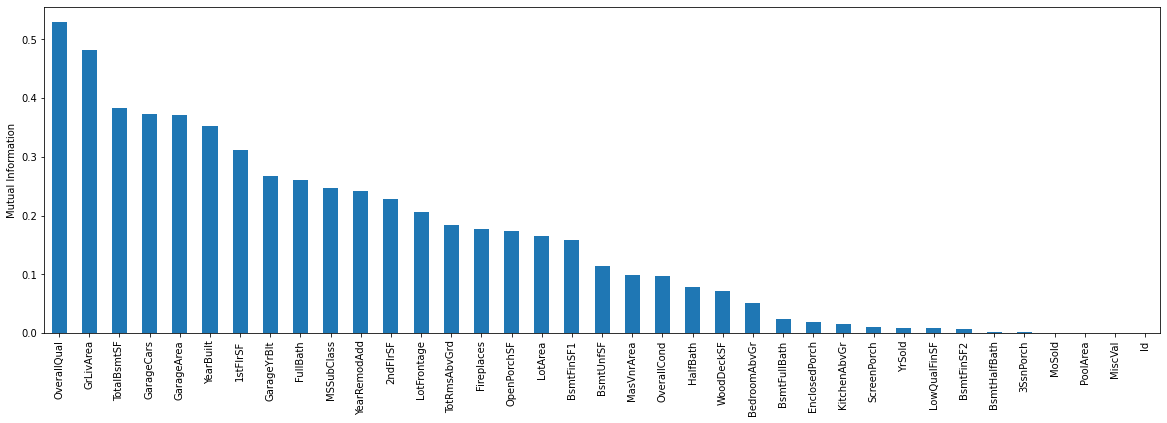

In [15]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

## Select top 10th percentile features

In [16]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [17]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[7.000e+00, 1.057e+03, 2.034e+03, 2.000e+00],
       [6.000e+00, 1.291e+03, 1.291e+03, 2.000e+00],
       [5.000e+00, 8.580e+02, 8.580e+02, 0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 1.902e+03, 2.000e+00],
       [7.000e+00, 1.374e+03, 1.557e+03, 2.000e+00],
       [7.000e+00, 1.195e+03, 1.839e+03, 2.000e+00]])